# **AIRLINE PASSENGER SATISFACTION**

# OVERVIEW
The Airline Passenger Satisfaction dataset is a comprehensive collection of customer feedback from passengers. The dataset contains information on various aspects of the passengers’ travel experience, such as flight distance, gender, age, type of travel, class, seat comfort, inflight entertainment, onboard service, cleanliness, departure delay, arrival delay, and overall satisfaction. This dataset aims to provide insights into the factors that contribute to passenger satisfaction and dissatisfaction, which can be used by airlines to improve their services and enhance their customers’ travel experience

# Features

1.ID: Unique identifier for each passenger.

2.Gender: Gender of the passenger (Male/Female).

3.Age: Age of the passenger.

4.Customer Type: Whether the passenger is a Returning or New customer.

5.Type of Travel: Purpose of travel (Business, Personal).

6.Class: Travel class (Economy, Business, Economy Plus).

7.Flight Distance: Distance of the flight in miles.

8.Departure Delay: Delay at departure in minutes.

9.Arrival Delay: Delay at arrival in minutes.

10.Departure and Arrival Time Convenience: Passenger rating for the convenience of departure and arrival times.

11.Ease of Online Booking: Passenger rating for the ease of online booking.

12.Check-in Service: Passenger rating for the check-in service.

13.Online Boarding: Passenger rating for the online boarding process.

14.Gate Location: Passenger rating for the gate location.

15.On-board Service: Passenger rating for the on-board service.

16.Seat Comfort: Passenger rating for seat comfort.

17.Leg Room Service: Passenger rating for leg room service.

18.Cleanliness: Passenger rating for cleanliness.

19.Food and Drink: Passenger rating for food and drink service.

20.In-flight Service: Passenger rating for in-flight service.

21.In-flight Wifi Service: Passenger rating for in-flight wifi service.

22.In-flight Entertainment: Passenger rating for in-flight entertainment.

23.Baggage Handling: Passenger rating for baggage handling.

24.Satisfaction: Overall satisfaction of the passenger (Satisfied, Neutral or Dissatisfied).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,f1_score,precision_score,recall_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Project/airline_passenger_satisfaction.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3.0,...,3,5,2,5,5,5,3.0,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2.0,...,5,4,5,5,3,5,2.0,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4.0,...,3,5,3,5,5,3,4.0,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2.0,...,5,5,5,4,4,5,2.0,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3.0,...,3,4,4,5,4,3,3.0,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4.0,...,5,1,4,4,4,5,4.0,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5.0,...,5,2,5,2,2,4,3.0,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5.0,...,3,3,4,3,3,4,2.0,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4.0,...,4,4,5,3,3,4,5.0,3,5,Satisfied


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.isna().sum()

ID                                           0
Gender                                       0
Age                                          0
Customer Type                                0
Type of Travel                               0
Class                                        0
Flight Distance                              0
Departure Delay                              0
Arrival Delay                              393
Departure and Arrival Time Convenience    6681
Ease of Online Booking                    5682
Check-in Service                             0
Online Boarding                           3080
Gate Location                                0
On-board Service                             0
Seat Comfort                                 0
Leg Room Service                             0
Cleanliness                                  0
Food and Drink                               0
In-flight Service                            0
In-flight Wifi Service                    3916
In-flight Ent

In [ ]:
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                            int64
Online Boarding                           float64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [ ]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,123199.000000,124198.000000,129880.000000,126800.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,125964.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.223411,2.883001,3.306275,3.331640,2.976933,3.383061,3.441369,3.350878,3.286434,3.205790,3.642231,2.813526,3.358215,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.386673,1.300440,1.266168,1.267096,1.278505,1.287013,1.319272,1.316252,1.313454,1.327864,1.176566,1.258336,1.333752,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# FILLING MISSING VALUES

In [ ]:
missing_values=['Arrival Delay','Departure and Arrival Time Convenience','Ease of Online Booking','Online Boarding','In-flight Wifi Service']
for i in missing_values:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3.0,3.0,...,3,5,2,5,5,5,3.0,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2.0,2.0,...,5,4,5,5,3,5,2.0,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4.0,4.0,...,3,5,3,5,5,3,4.0,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2.0,2.0,...,5,5,5,4,4,5,2.0,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3.0,3.0,...,3,4,4,5,4,3,3.0,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4.0,4.0,...,5,1,4,4,4,5,4.0,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5.0,3.0,...,5,2,5,2,2,4,3.0,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5.0,2.0,...,3,3,4,3,3,4,2.0,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4.0,4.0,...,4,4,5,3,3,4,5.0,3,5,Satisfied


**Satisfaction Countplot**

<Axes: xlabel='Satisfaction', ylabel='count'>

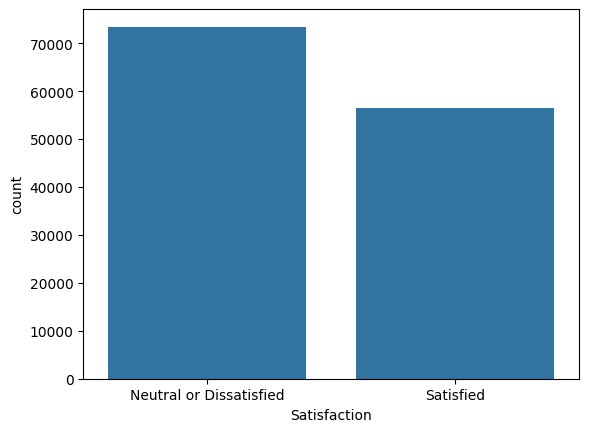

In [ ]:
sns.countplot(x='Satisfaction',data=df)

**Passenger distribution by Age**

<Axes: xlabel='Age', ylabel='Count'>

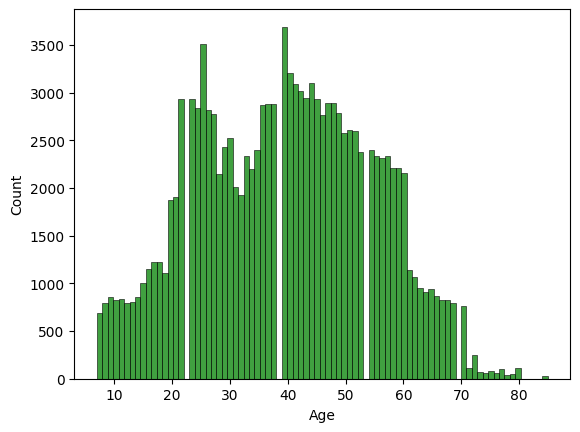

In [ ]:
sns.histplot(x="Age", data=df,color="green")

**Customer Type based on Type of Travel**

<Axes: xlabel='Customer Type', ylabel='count'>

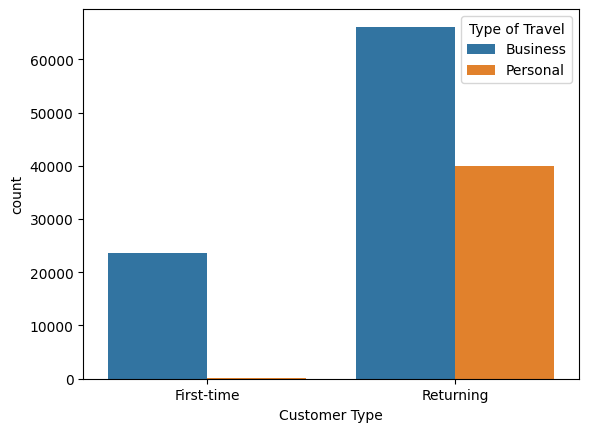

In [ ]:
sns.countplot(x = "Customer Type", data=df, hue="Type of Travel")

**Cabin Class wise Satisfaction**

<Axes: xlabel='Class', ylabel='count'>

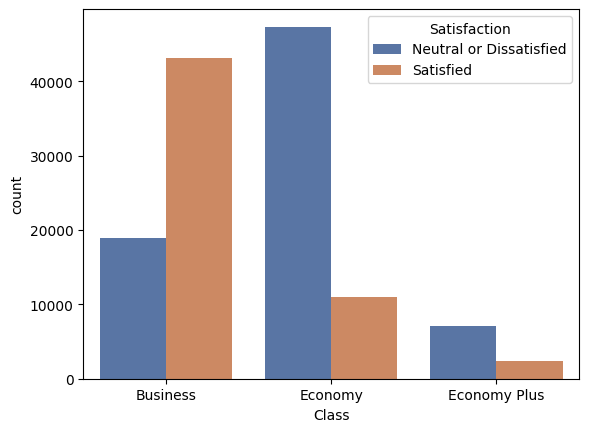

In [ ]:
sns.countplot(x='Class', hue='Satisfaction',
              data=df, palette = 'deep')

**Genderwise Satisfaction**

<Axes: xlabel='Satisfaction', ylabel='count'>

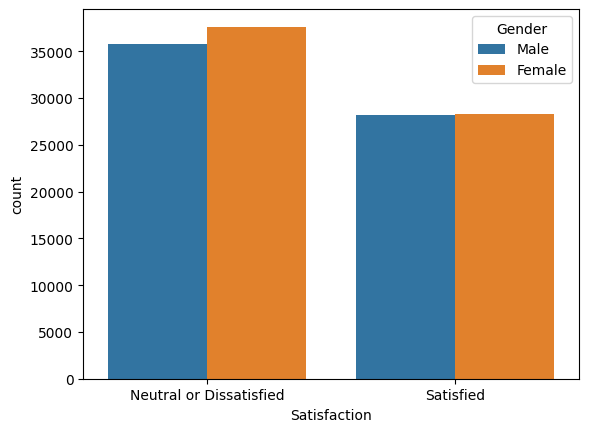

In [ ]:
sns.countplot(x='Satisfaction',data=df,hue='Gender')

**Online Bookiing Satisfaction Distribution**

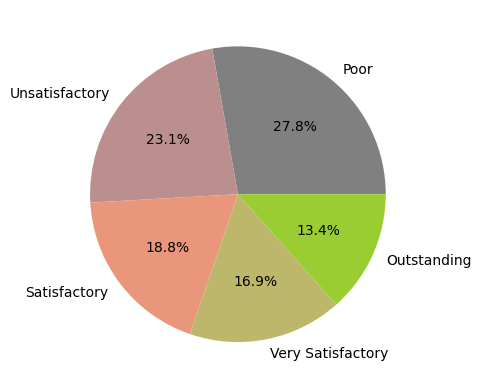

In [ ]:
quantity=df['Ease of Online Booking'].value_counts()
comp=['Poor','Unsatisfactory','Satisfactory','Very Satisfactory','Outstanding']
colors=['grey','rosybrown','darksalmon','darkkhaki','yellowgreen']
plt.pie(quantity,labels=comp,autopct='%0.1f%%',colors=colors)
plt.show()

**Food and Drink Satisfaction Distribution**

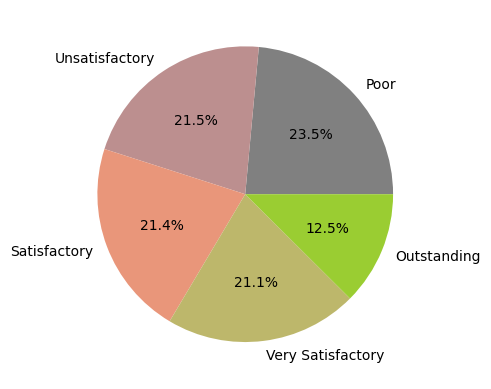

In [ ]:
quantity=df['Food and Drink'].value_counts()
pcolors=['grey','rosybrown','darksalmon','darkkhaki','yellowgreen']
plt.pie(quantity,labels=comp,autopct='%0.1f%%',colors=colors)
plt.show()

**Online Boarding Satisfaction Distribution**

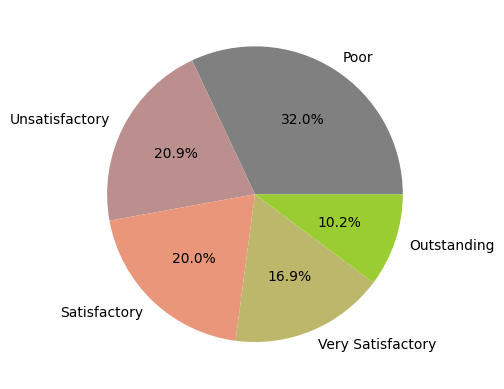

In [ ]:
quantity=df['Online Boarding'].value_counts()
colors=['grey','rosybrown','darksalmon','darkkhaki','yellowgreen']
plt.pie(quantity,labels=comp,autopct='%0.1f%%',colors=colors)
plt.show()

**Distancewise Passenger Amount**

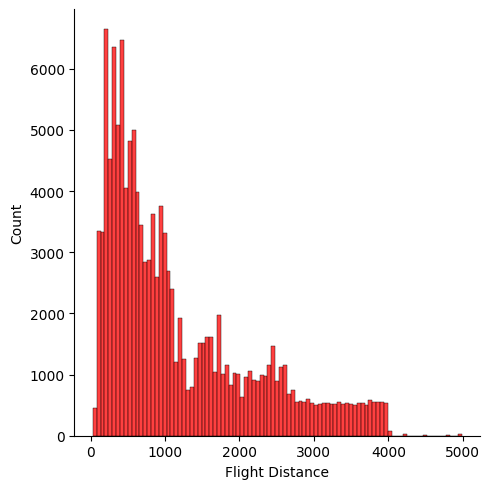

In [ ]:
sns.displot(df['Flight Distance'],color='red')

**Passenger Satisfaction Age wise**

<Axes: xlabel='Satisfaction', ylabel='count'>

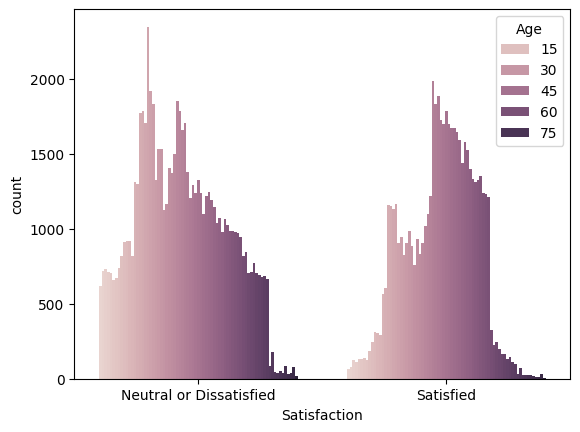

In [ ]:
sns.countplot(x='Satisfaction',data=df,hue='Age')

# ENCODING CATEGORICAL VALUES INTO NUMERICAL VALUES

In [ ]:
encoder=LabelEncoder()
enc=['Gender','Customer Type','Type of Travel','Class','Satisfaction']
for i in enc:
  df[i]=encoder.fit_transform(df[i])

In [ ]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3.0,3.0,...,3,5,2,5,5,5,3.0,5,5,0
1,0,35,1,0,0,821,26,39.0,2.0,2.0,...,5,4,5,5,3,5,2.0,5,5,1
2,1,41,1,0,0,853,0,0.0,4.0,4.0,...,3,5,3,5,5,3,4.0,3,3,1
3,1,50,1,0,0,1905,0,0.0,2.0,2.0,...,5,5,5,4,4,5,2.0,5,5,1
4,0,49,1,0,0,3470,0,1.0,3.0,3.0,...,3,4,4,5,4,3,3.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,447,2,3.0,4.0,4.0,...,5,1,4,4,4,5,4.0,4,4,0
129876,1,41,1,1,2,308,0,0.0,5.0,3.0,...,5,2,5,2,2,4,3.0,2,5,0
129877,1,42,1,1,2,337,6,14.0,5.0,2.0,...,3,3,4,3,3,4,2.0,3,5,0
129878,1,50,1,1,2,337,31,22.0,4.0,4.0,...,4,4,5,3,3,4,5.0,3,5,1


In [ ]:
X=df.iloc[:,:-1]
X

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,48,0,0,0,821,2,5.0,3.0,3.0,...,3,3,5,2,5,5,5,3.0,5,5
1,0,35,1,0,0,821,26,39.0,2.0,2.0,...,2,5,4,5,5,3,5,2.0,5,5
2,1,41,1,0,0,853,0,0.0,4.0,4.0,...,4,3,5,3,5,5,3,4.0,3,3
3,1,50,1,0,0,1905,0,0.0,2.0,2.0,...,2,5,5,5,4,4,5,2.0,5,5
4,0,49,1,0,0,3470,0,1.0,3.0,3.0,...,3,3,4,4,5,4,3,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,447,2,3.0,4.0,4.0,...,2,5,1,4,4,4,5,4.0,4,4
129876,1,41,1,1,2,308,0,0.0,5.0,3.0,...,4,5,2,5,2,2,4,3.0,2,5
129877,1,42,1,1,2,337,6,14.0,5.0,2.0,...,1,3,3,4,3,3,4,2.0,3,5
129878,1,50,1,1,2,337,31,22.0,4.0,4.0,...,1,4,4,5,3,3,4,5.0,3,5


In [ ]:
y=df.iloc[:,-1]
y

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129880, dtype: int64

# SCALING DATASET

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[1.        , 0.52564103, 0.        , ..., 0.5       , 1.        ,
        1.        ],
       [0.        , 0.35897436, 1.        , ..., 0.25      , 1.        ,
        1.        ],
       [1.        , 0.43589744, 1.        , ..., 0.75      , 0.5       ,
        0.5       ],
       ...,
       [1.        , 0.44871795, 1.        , ..., 0.25      , 0.5       ,
        1.        ],
       [1.        , 0.55128205, 1.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.        , 0.16666667, 1.        , ..., 0.5       , 0.25      ,
        0.        ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# MODEL BUILDING AND PREDICTING

**KNN**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     22072
           1       0.94      0.88      0.91     16892

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964



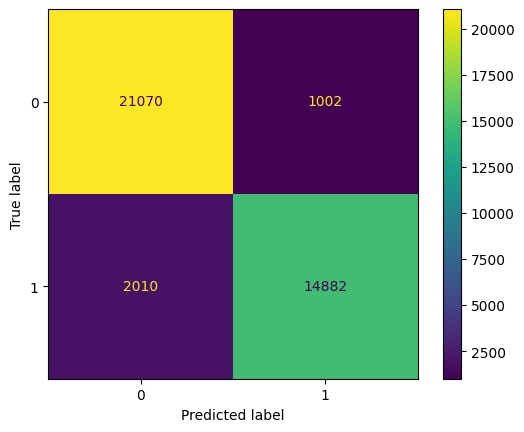

In [ ]:
accuracy=[]
f1score=[]
precision=[]
recall=[]
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1score.append(f1_score(y_test,y_pred))

**Gaussian NB**

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     22072
           1       0.86      0.81      0.84     16892

    accuracy                           0.86     38964
   macro avg       0.86      0.86      0.86     38964
weighted avg       0.86      0.86      0.86     38964



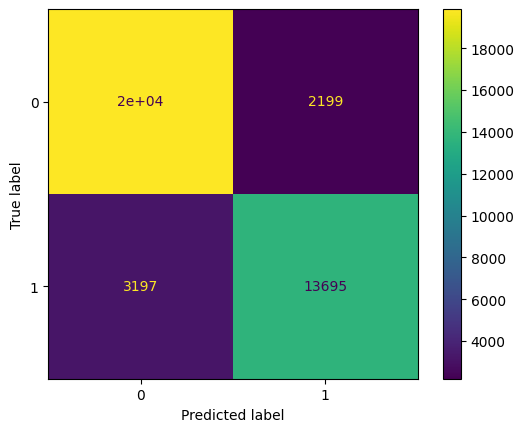

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1score.append(f1_score(y_test,y_pred))

**Decision Tree**

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     22072
           1       0.93      0.93      0.93     16892

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



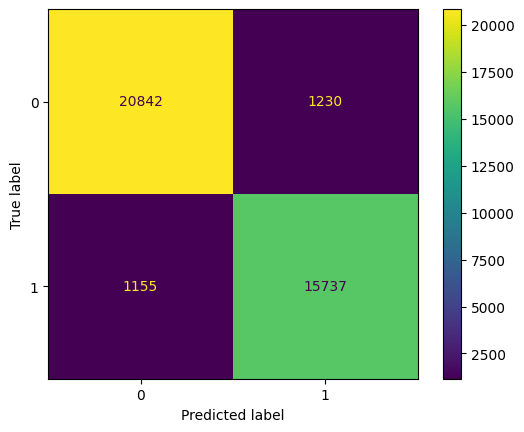

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1score.append(f1_score(y_test,y_pred))

**Random Forest**

In [ ]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     22072
           1       0.97      0.93      0.95     16892

    accuracy                           0.96     38964
   macro avg       0.96      0.95      0.96     38964
weighted avg       0.96      0.96      0.96     38964



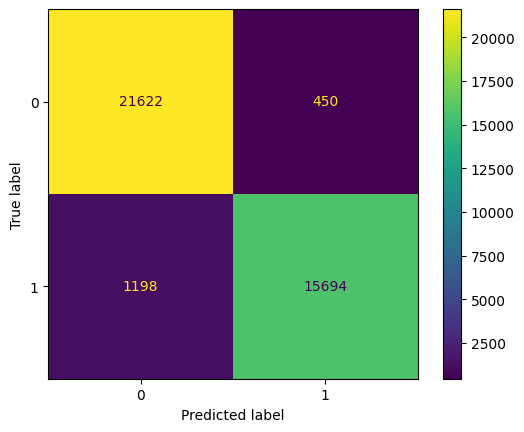

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1score.append(f1_score(y_test,y_pred))

**Gradient Boost**

In [ ]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     22072
           1       0.94      0.90      0.92     16892

    accuracy                           0.93     38964
   macro avg       0.93      0.93      0.93     38964
weighted avg       0.93      0.93      0.93     38964



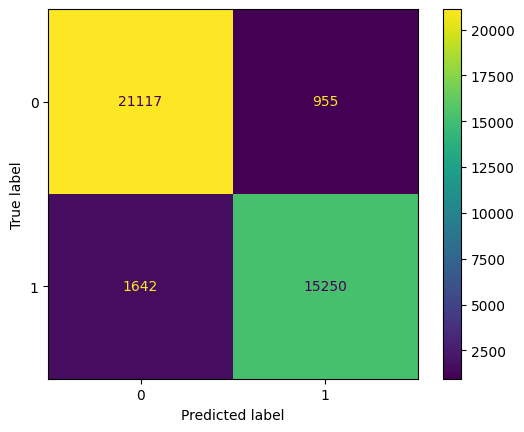

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1score.append(f1_score(y_test,y_pred))

**Ada Boost**

In [ ]:
ab=AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)
y_pred=ab.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     22072
           1       0.90      0.89      0.89     16892

    accuracy                           0.91     38964
   macro avg       0.91      0.91      0.91     38964
weighted avg       0.91      0.91      0.91     38964



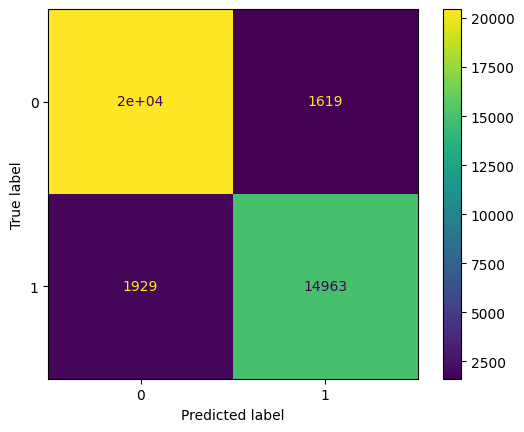

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1score.append(f1_score(y_test,y_pred))

# Conclusion

1. All models have high accuracy, precision, recall, and F1 scores.
2. The Random Forest model consistently outperforms the others across all metrics.
3. The Random Forest model has the highest accuracy (0.96), precision (0.97), recall (0.93), and F1 score (0.95), indicating it is the most effective model overall.
4. The GaussianNB model has the lowest accuracy (0.86), precision (0.86), recall (0.81), and F1 score(0.84), indicating it is the least effective model overall.


In [ ]:
analysis=pd.DataFrame({'Model':['KNeighbors','GaussianNB','Decision Tree','Random Forest','Gradient Boost','Ada Boost'],"Accuracy":accuracy,"Precison":precision,"Recall":recall,'F1 Score':f1score})
analysis

,Model,Accuracy,Precison,Recall,F1 Score
0,KNeighbors,0.922698,0.936918,0.881009,0.908103
1,GaussianNB,0.861513,0.861646,0.810739,0.835418
2,Decision Tree,0.938790,0.927506,0.931624,0.929561
3,Random Forest,0.957705,0.972126,0.929079,0.950115
4,Gradient Boost,0.933349,0.941068,0.902794,0.921534
5,Ada Boost,0.908942,0.902364,0.885804,0.894007


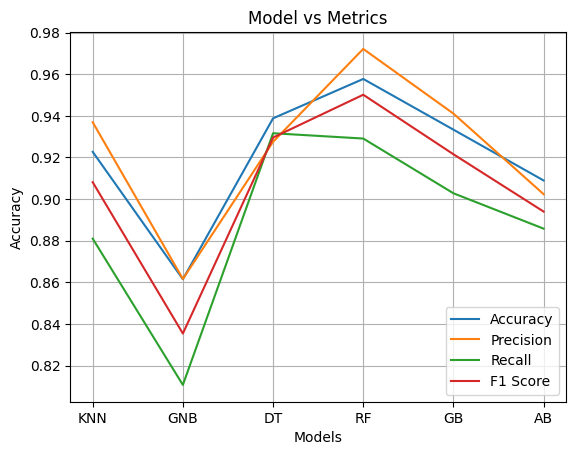

In [ ]:
model=['KNN','GNB','DT','RF','GB','AB']
plt.plot(model, accuracy, label='Accuracy')
plt.plot(model, precision, label='Precision')
plt.plot(model, recall, label='Recall')
plt.plot(model, f1score, label='F1 Score')

plt.title('Model vs Metrics')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# FEATURE SELECTION

**CORRELATION**

In [ ]:
df.corr()['Satisfaction']

Gender                                    0.011236
Age                                       0.134091
Customer Type                             0.186017
Type of Travel                           -0.449861
Class                                    -0.448193
Flight Distance                           0.298085
Departure Delay                          -0.050740
Arrival Delay                            -0.058145
Departure and Arrival Time Convenience   -0.046652
Ease of Online Booking                    0.234235
Check-in Service                          0.237250
Online Boarding                           0.559371
Gate Location                            -0.002786
On-board Service                          0.322200
Seat Comfort                              0.348829
Leg Room Service                          0.312424
Cleanliness                               0.307016
Food and Drink                            0.211642
In-flight Service                         0.244911
In-flight Wifi Service         

**CORRELATION HEATMAP**

<Axes: >

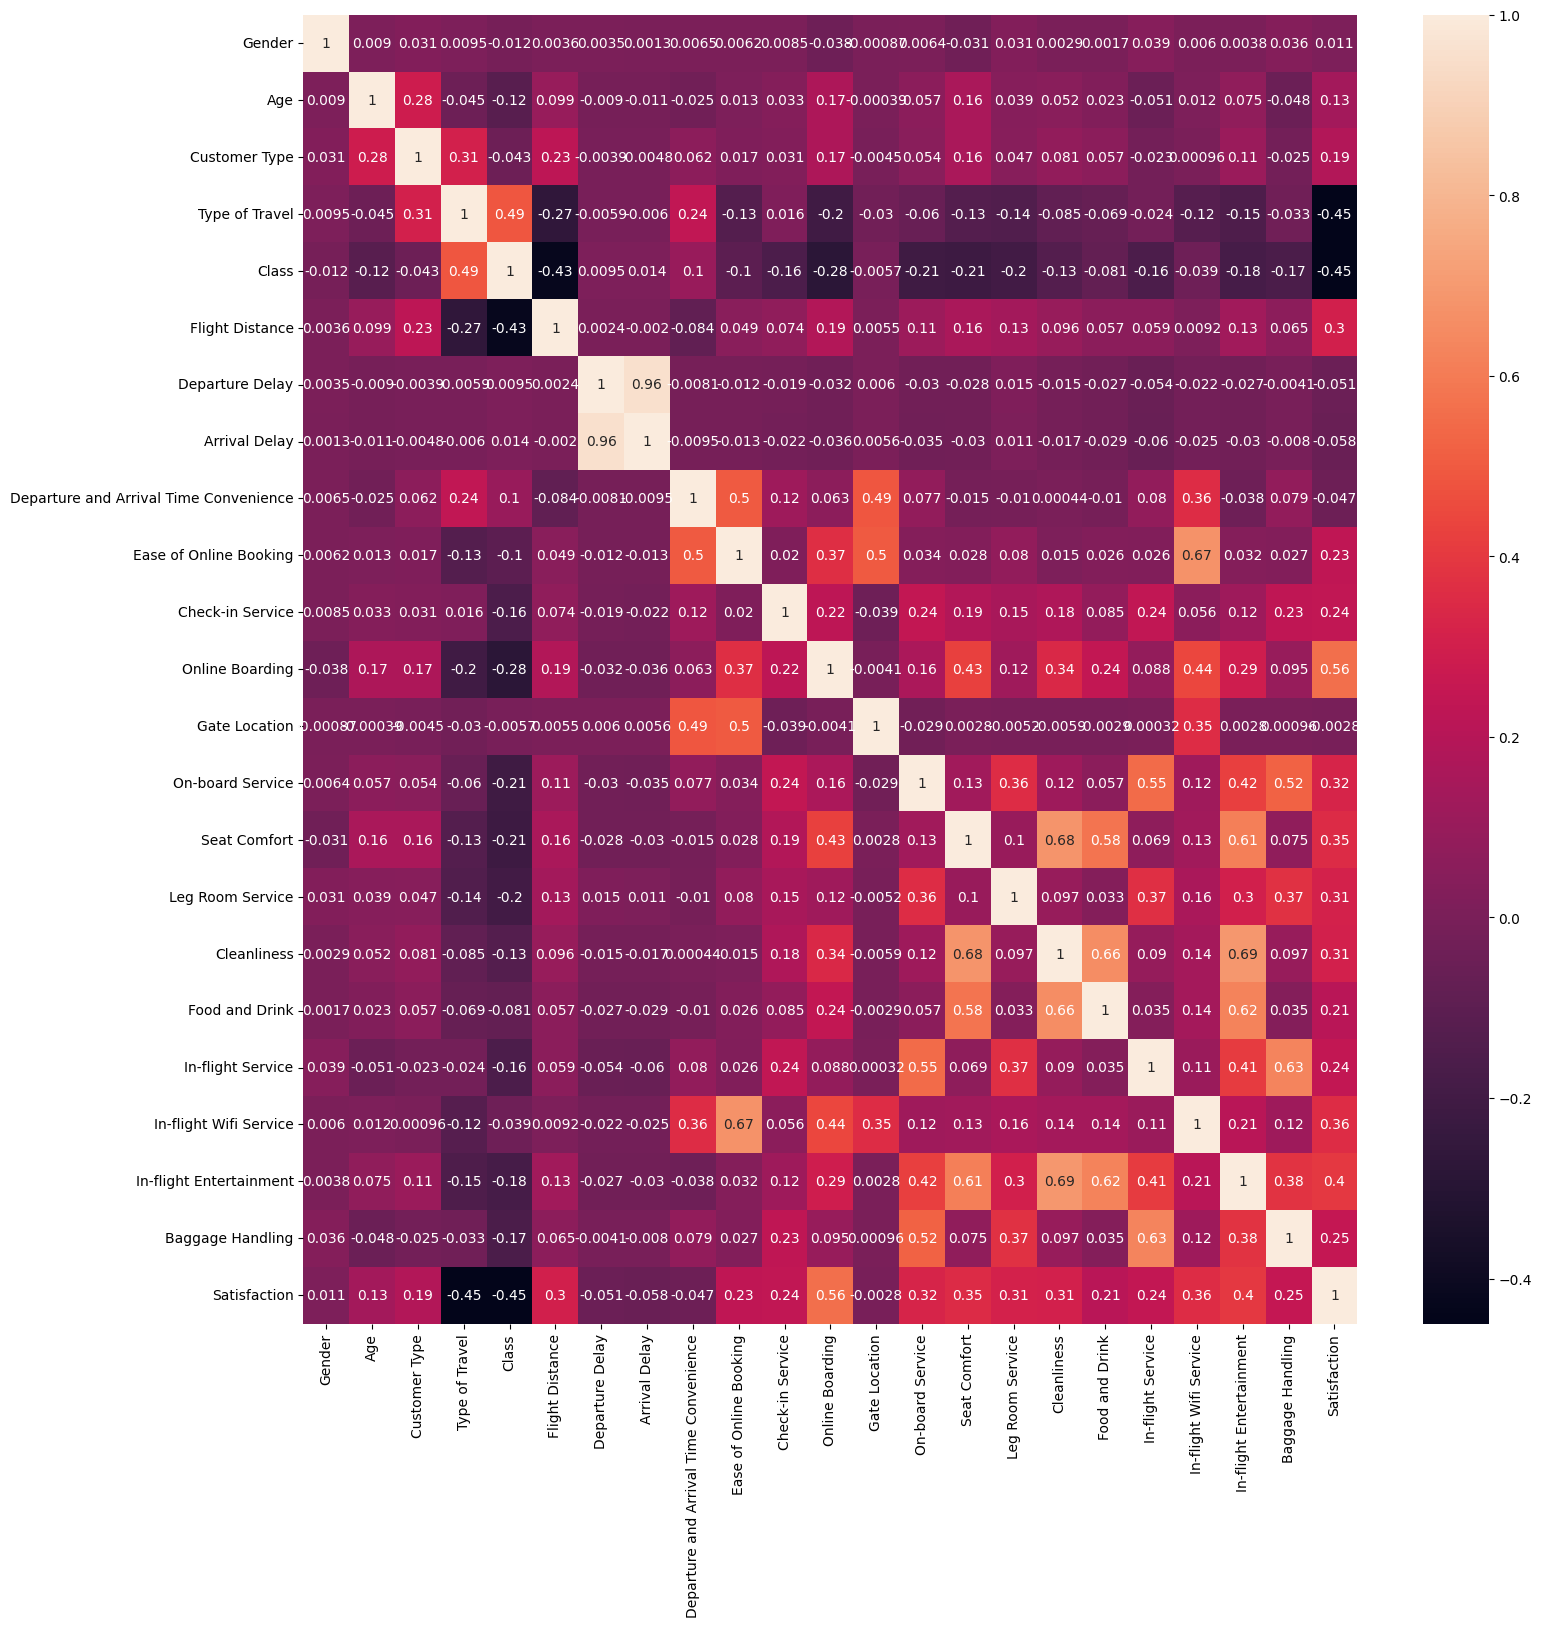

In [ ]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(),annot=True)

The heat map above indicates the correlation matrix among numeric variables in the dataset

In [ ]:
df=df.drop(['Departure Delay','Arrival Delay','Departure and Arrival Time Convenience','Gate Location'],axis=1)

In [ ]:
X=df.drop(['Satisfaction'],axis=1)
X

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,48,0,0,0,821,3.0,4,3.0,3,5,2,5,5,5,3.0,5,5
1,0,35,1,0,0,821,2.0,3,5.0,5,4,5,5,3,5,2.0,5,5
2,1,41,1,0,0,853,4.0,4,5.0,3,5,3,5,5,3,4.0,3,3
3,1,50,1,0,0,1905,2.0,3,4.0,5,5,5,4,4,5,2.0,5,5
4,0,49,1,0,0,3470,3.0,3,5.0,3,4,4,5,4,3,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,447,4.0,4,4.0,5,1,4,4,4,5,4.0,4,4
129876,1,41,1,1,2,308,3.0,5,3.0,5,2,5,2,2,4,3.0,2,5
129877,1,42,1,1,2,337,2.0,4,2.0,3,3,4,3,3,4,2.0,3,5
129878,1,50,1,1,2,337,4.0,3,4.0,4,4,5,3,3,4,5.0,3,5


In [ ]:
y=df['Satisfaction']
y

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129880, dtype: int64

In [ ]:
X_train_fs,X_test_fs,y_train_fs,y_test_fs=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
knn_fs=KNeighborsClassifier(n_neighbors=3)
nb_fs=GaussianNB()
dt_fs=DecisionTreeClassifier()
rf_fs=RandomForestClassifier(random_state=42)
gb_fs=GradientBoostingClassifier(random_state=42)
ab_fs=AdaBoostClassifier(random_state=42)

In [ ]:
accuracy_corr=[]
models=[knn_fs,nb_fs,dt_fs,rf_fs,gb_fs,ab_fs]
for model in models:
  print(model)
  model.fit(X_train_fs,y_train_fs)
  y_pred_fs=model.predict(X_test_fs)
  print(classification_report(y_test_fs,y_pred_fs))
  accuracy_corr.append(accuracy_score(y_test_fs,y_pred_fs))
  print('.'*100)

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     22072
           1       0.79      0.74      0.76     16892

    accuracy                           0.80     38964
   macro avg       0.80      0.79      0.80     38964
weighted avg       0.80      0.80      0.80     38964

....................................................................................................
GaussianNB()
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     22072
           1       0.87      0.81      0.84     16892

    accuracy                           0.86     38964
   macro avg       0.86      0.86      0.86     38964
weighted avg       0.86      0.86      0.86     38964

....................................................................................................
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0   

# Conclusion

1. All models have high accuracy, precision, recall, and F1 scores.
2. The Random Forest model consistently outperforms the others across all metrics.
3. The Random Forest model has the highest accuracy (0.96), precision (0.96), recall (0.95), and F1 score (0.96), indicating it is the most effective model overall.
4. The K Nearest Neigbbors model has the lowest accuracy (0.80), precision (0.80), recall (0.79), and F1 score(0.80), indicating it is the least effective model overall.

In [ ]:
df['Satisfaction'].value_counts()

Satisfaction
0    73452
1    56428
Name: count, dtype: int64

# **BALANCING IMBALANCED DATASET**

# OVERSAMPLING

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
y_os.value_counts()

Satisfaction
0    73452
1    73452
Name: count, dtype: int64

In [ ]:
scaler1=MinMaxScaler()
X_os_scaled=scaler1.fit_transform(X_os)

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os_scaled,y_os,random_state=1,test_size=0.3)

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=3)
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier()
rf_os=RandomForestClassifier(random_state=42)
gb_os=GradientBoostingClassifier(random_state=42)
ab_os=AdaBoostClassifier(random_state=42)

In [ ]:
models=[knn_os,nb_os,dt_os,rf_os,gb_os,ab_os]
accuracy_os=[]
for model in models:
  print(model)
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  accuracy_os.append(accuracy_score(y_test_os,y_pred_os))
  print('.'*100)

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     22016
           1       0.94      0.90      0.92     22056

    accuracy                           0.92     44072
   macro avg       0.92      0.92      0.92     44072
weighted avg       0.92      0.92      0.92     44072

....................................................................................................
GaussianNB()
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     22016
           1       0.89      0.83      0.86     22056

    accuracy                           0.86     44072
   macro avg       0.86      0.86      0.86     44072
weighted avg       0.86      0.86      0.86     44072

....................................................................................................
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0   

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': (100, 300),
    'max_depth': (10, 30),
    'criterion': ('entropy','gini')}
random_search = RandomizedSearchCV(estimator=rf_os, param_distributions=param_dist, n_iter=50, scoring='accuracy', random_state=42)
random_search.fit(X_train_os, y_train_os)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   param_distributions={'criterion': ('entropy', 'gini'),
                                        'max_depth': (10, 30),
                                        'n_estimators': (100, 300)},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.best_params_

{'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'}

In [ ]:
rf_ht=RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=30)
rf_ht.fit(X_train_os,y_train_os)
y_pred_ht=rf_ht.predict(X_test_os)
print(classification_report(y_test_os,y_pred_ht))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     22016
           1       0.97      0.95      0.96     22056

    accuracy                           0.96     44072
   macro avg       0.96      0.96      0.96     44072
weighted avg       0.96      0.96      0.96     44072



**ROC CURVE OF RANDOM FOREST CLASSIFIER**

In [ ]:
# The ROC curve is the plot of the true positive rate against the false positive rate at each threshold setting.

In [ ]:
from sklearn.metrics import roc_curve, auc
y_scores = rf_fs.predict_proba(X_test_fs)[:, 1]
y_true = y_test
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

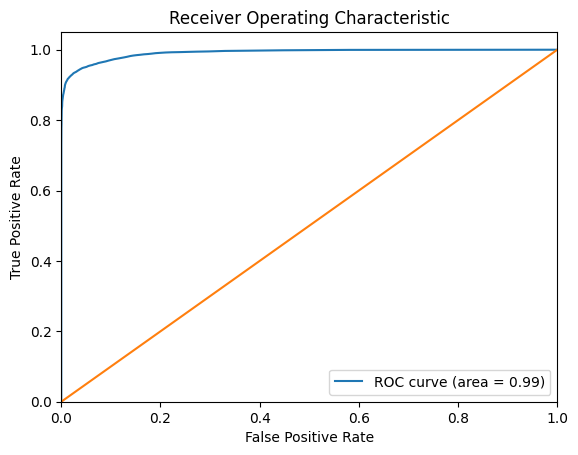

In [ ]:
plt.figure()
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [ ]:
result=pd.DataFrame({'Model':['KNeighbors','GaussianNB','Decision Tree','Random Forest','Gradient Boost','Ada Boost'],"Initial accuracy":accuracy,"Accuracy-Feature selection":accuracy_corr,"Oversampling Accuracy":accuracy_os})
result

,Model,Initial accuracy,Accuracy-Feature selection,Oversampling Accuracy
0,KNeighbors,0.922698,0.802022,0.924283
1,GaussianNB,0.861513,0.864516,0.861840
2,Decision Tree,0.938790,0.933939,0.943297
3,Random Forest,0.957705,0.957089,0.961200
4,Gradient Boost,0.933349,0.932142,0.936105
5,Ada Boost,0.908942,0.905580,0.913233


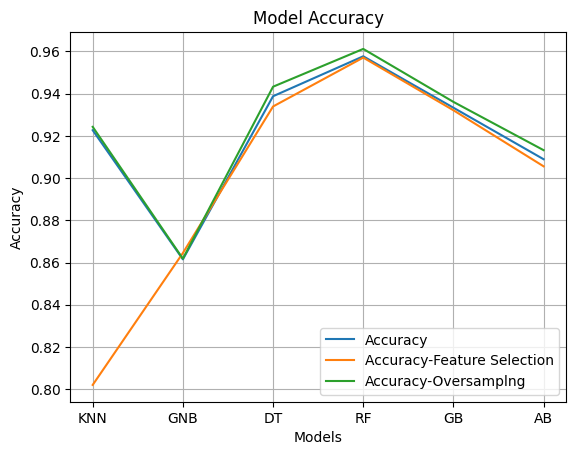

In [ ]:
model=['KNN','GNB','DT','RF','GB','AB']
plt.plot(model, accuracy, label='Accuracy')
plt.plot(model, accuracy_corr, label='Accuracy-Feature Selection')
plt.plot(model, accuracy_os, label='Accuracy-Oversamplng')

plt.title('Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pickle
pickle.dump(rf_os,open('airline.sav','wb'))

In [ ]:
pickle.dump(scaler1,open('scaler.sav','wb'))

# Conclusion

After performing feature selection, oversampling and hyperparameter tuning, the models were significantly optimized for predicting customer satisfaction. Key features influencing satisfaction were identified and prioritized, enhancing model efficiency and interpretability. Balancing the dataset improved the models' ability to generalize across satisfaction classes, mitigating bias towards majority classes. Overall, these steps collectively strengthened the models' predictive capabilities and reliability for practical applications in customer satisfaction prediction.